In [67]:
#j'importe les biblios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1-NETTOYAGE DES DONNEES**

In [68]:
#Chargement des données
df = pd.read_csv("D:\machine learning\Churn_Modelling.csv")
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Elie\AppData\Local\Temp\ipykernel_19652\3808234705.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\machine learning\Churn_Modelling.csv")


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
#les doublons 

print("\n Nombre de doublons :", df.duplicated().sum())



 Nombre de doublons : 0


In [70]:
#valeurs nulles
print("\n Valeurs manquantes :\n", df.isnull().sum())



 Valeurs manquantes :
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [71]:
#types de donnees 
print("\n Types de données :\n", df.dtypes)


 Types de données :
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [72]:
#frequence encoding
fe=df.groupby('Geography').size()/len(df)
df.loc[:,'Geography_freq_encode']=df['Geography'].map(fe)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_freq_encode
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.5014
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.2477
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.5014
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.5014
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.2477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.5014
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.5014
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.5014
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.2509


In [73]:
# Nettoyage : suppression des espaces et mise en minuscules
df['Gender'] = df['Gender'].str.strip().str.capitalize()

# Encodage binaire propre
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_freq_encode
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.5014
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.2477
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0.5014
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.5014
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.2477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,0.5014
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0.5014
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,0.5014
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0.2509


In [74]:
#je supprime les colonnes inutiles
print(" Dimensions :", df.shape)
colonnes_inutiles = ['RowNumber', 'CustomerId', 'Surname', 'Geography']
df.drop(columns=colonnes_inutiles, inplace=True)
print("\n Colonnes inutiles supprimées")
df.shape


 Dimensions : (10000, 15)

 Colonnes inutiles supprimées


(10000, 11)

In [75]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_freq_encode
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.375708
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.126056
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.247700
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.250900
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.501400
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.501400
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.501400


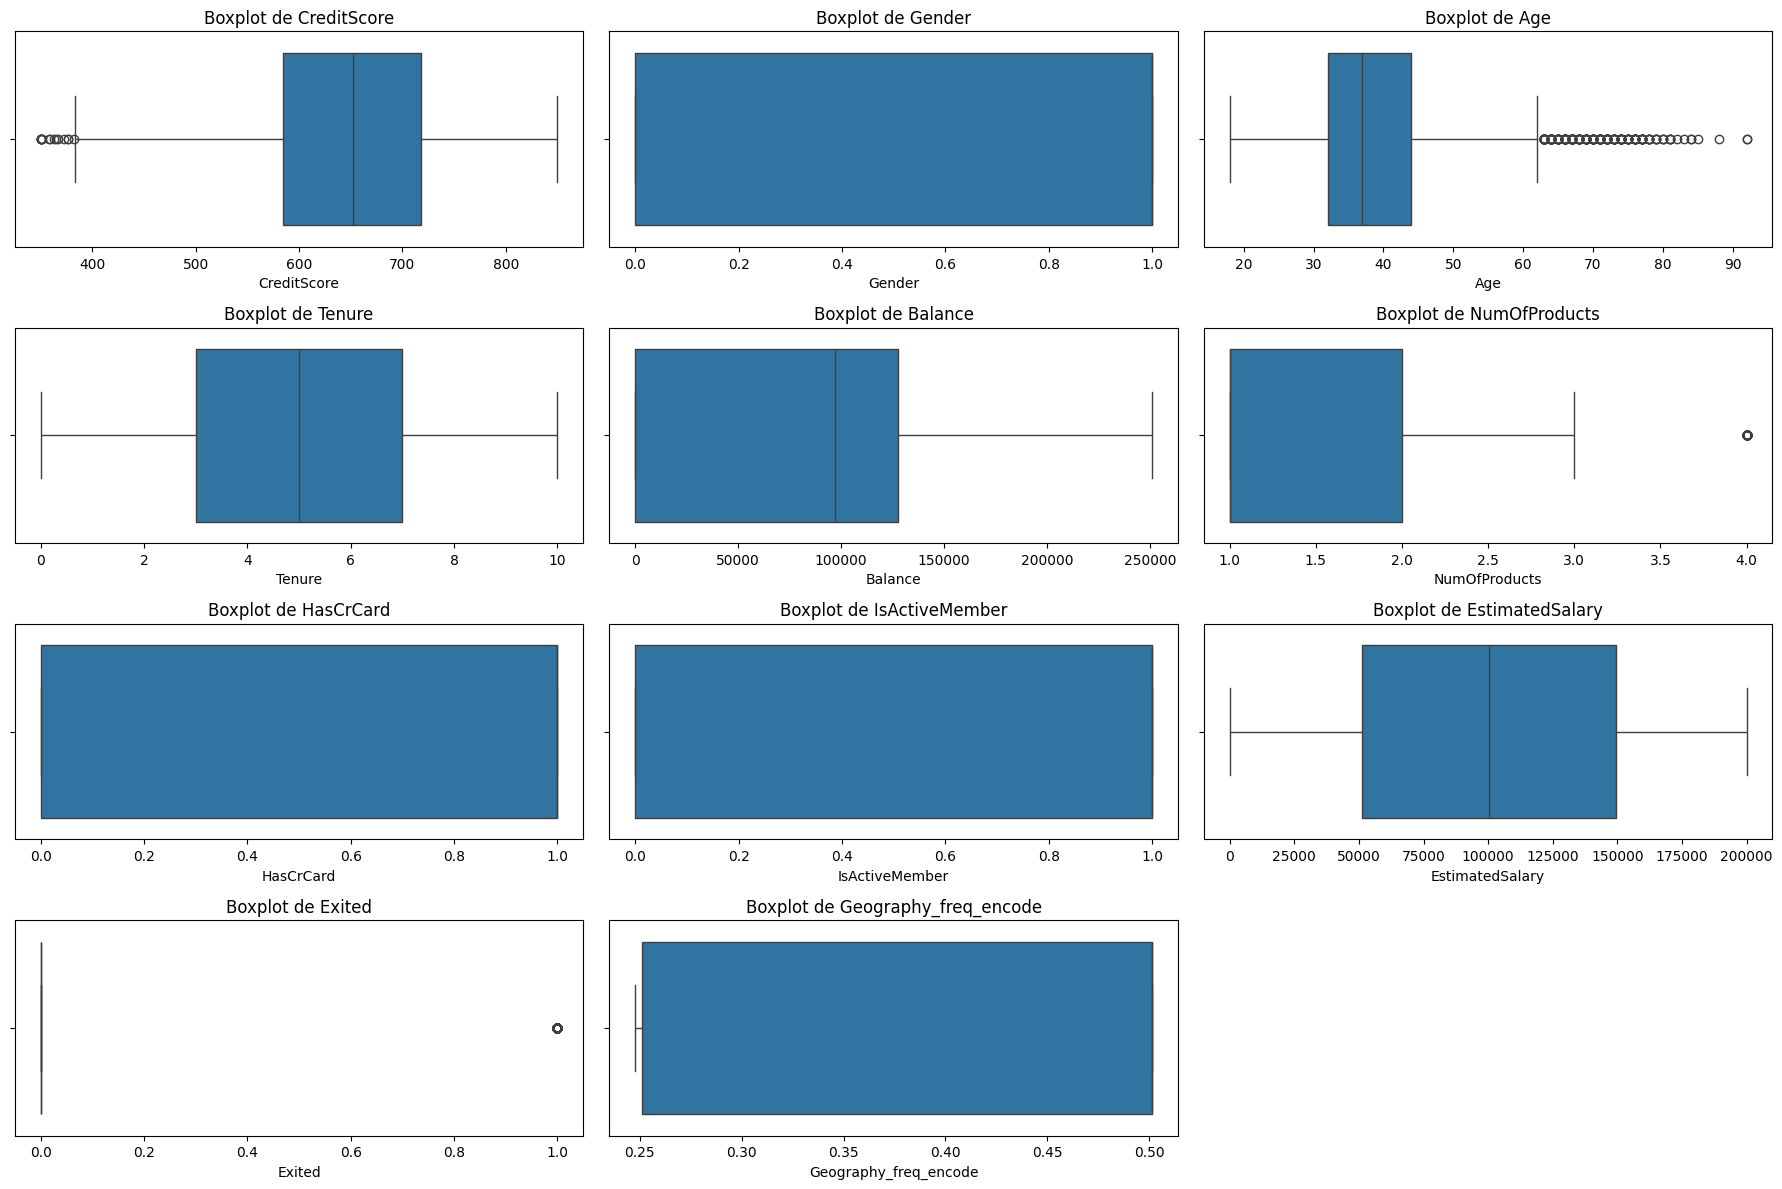

In [76]:
#valeurs aberrantes

plt.figure(figsize=(18, 12))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [77]:

print("Valeurs uniques dans Exited :", df['Exited'].unique())


Valeurs uniques dans Exited : [1 0]


In [78]:
def replace_outliers(df, target='Exited'):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    if target in numeric_cols:
        numeric_cols.remove(target)  

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [79]:
replace_outliers(df)

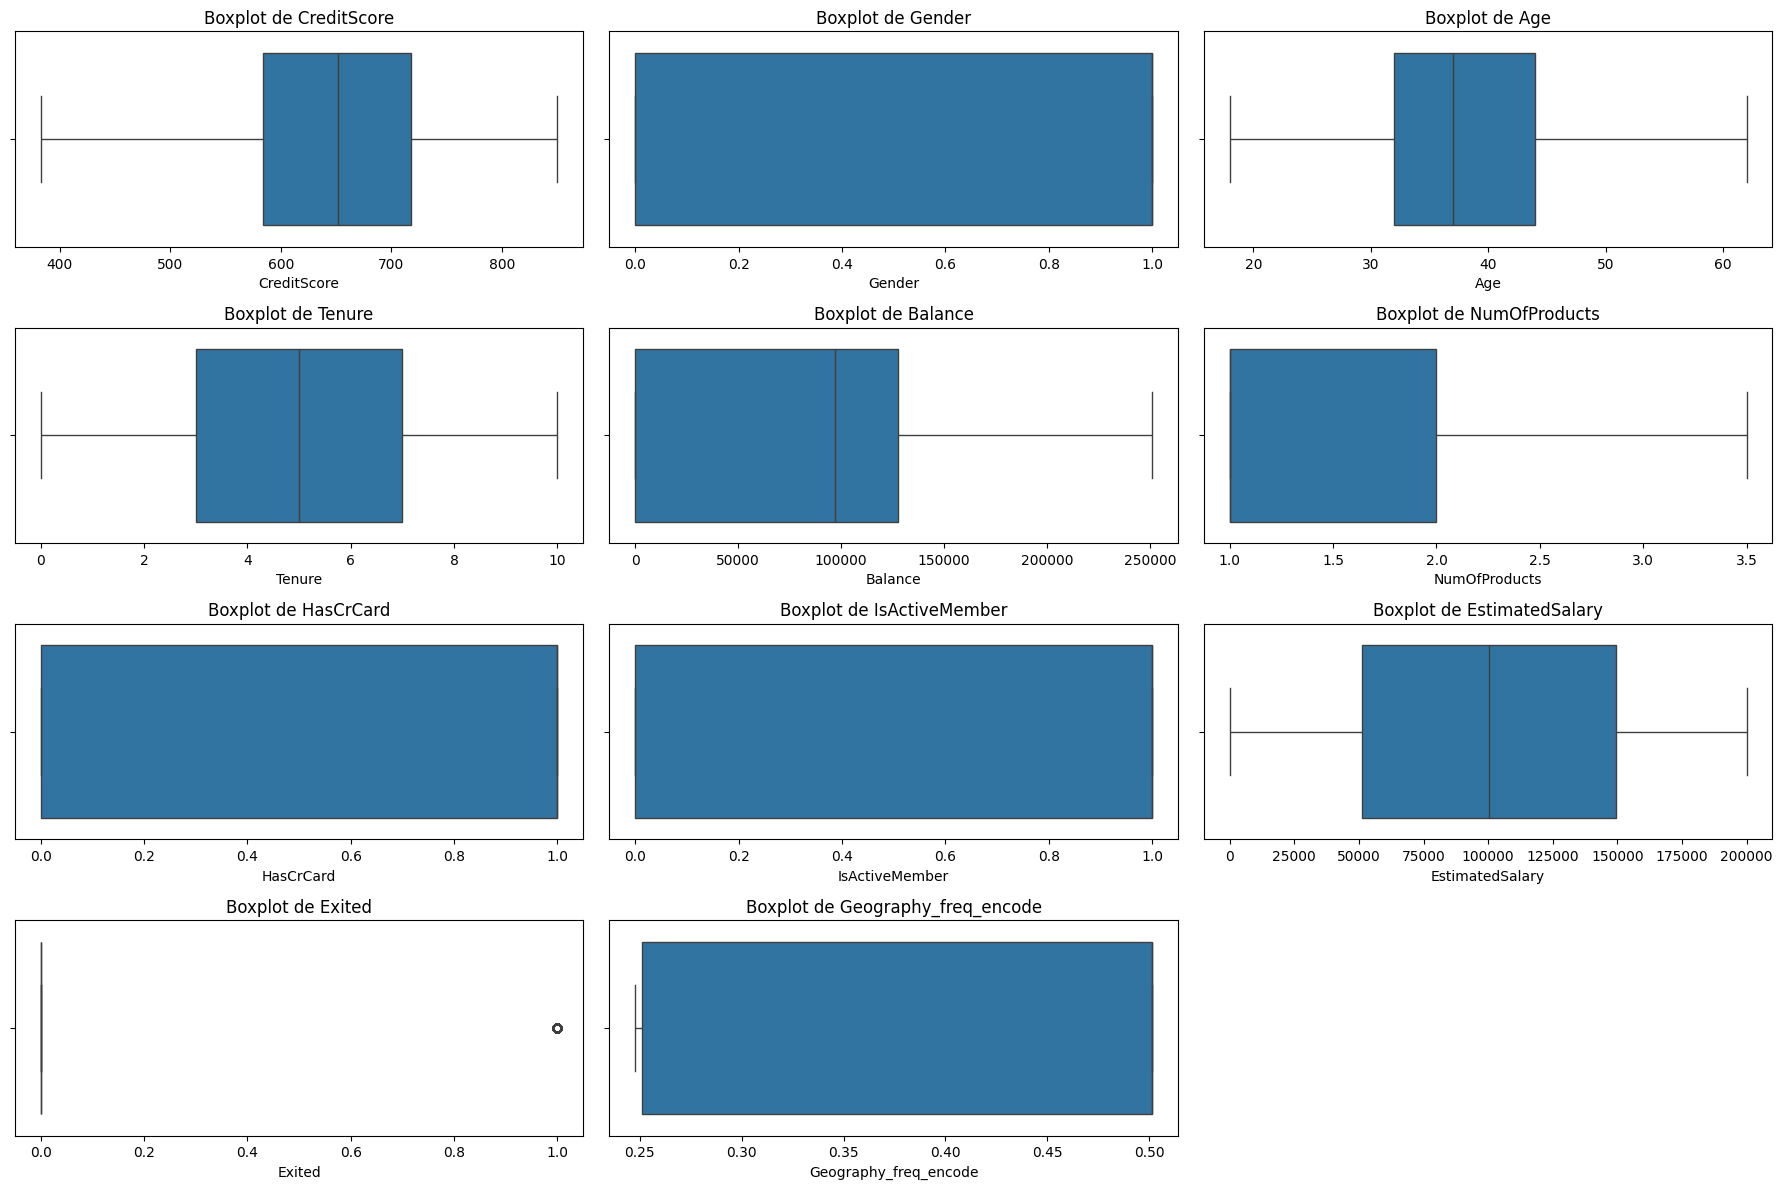

In [80]:

plt.figure(figsize=(18, 12))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [81]:
df['Exited'] = df['Exited'].astype(int)  # S'assurer que c'est bien numérique


**2-ANALYSE DES DONNEES**

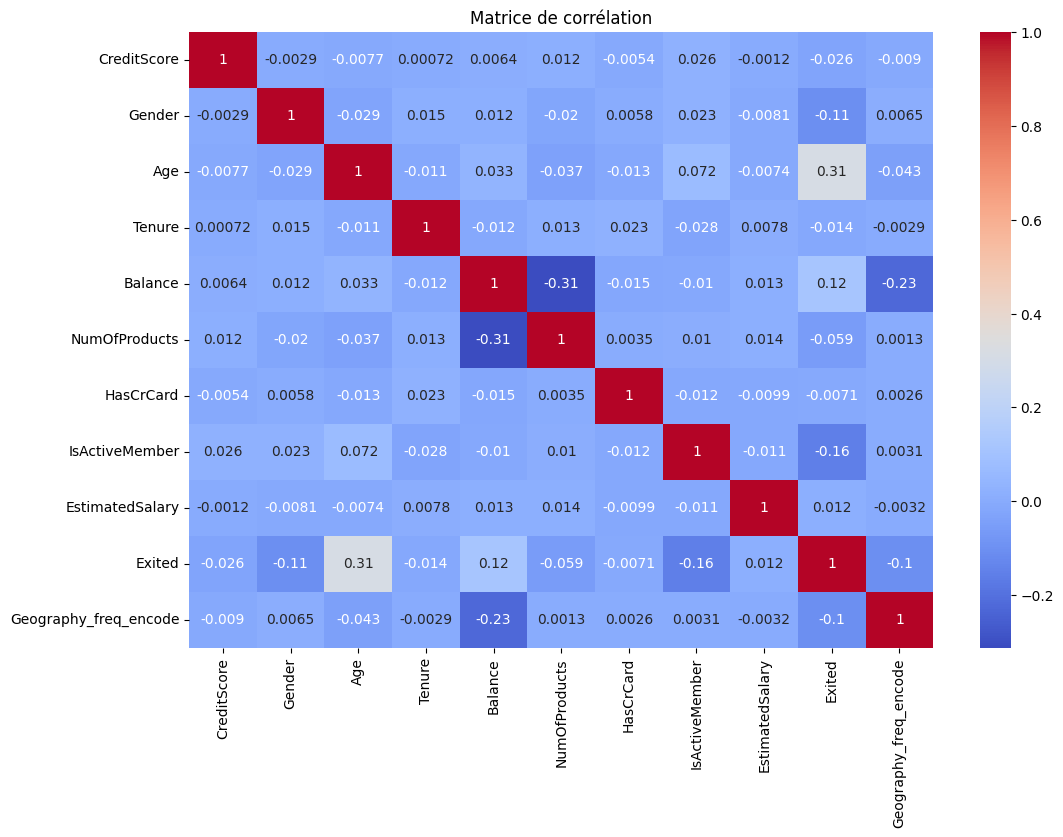

In [82]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

C:\Users\Elie\AppData\Local\Temp\ipykernel_19652\1938884585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


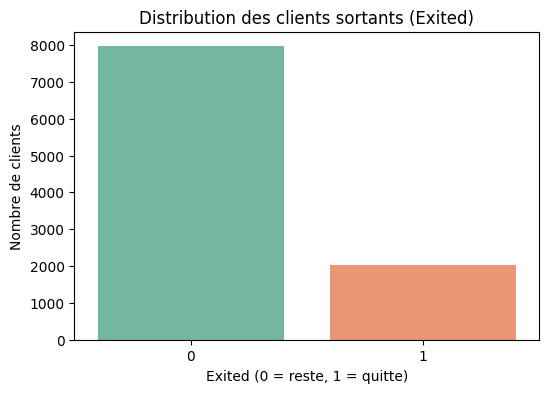

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Distribution des clients sortants (Exited)")
plt.xlabel("Exited (0 = reste, 1 = quitte)")
plt.ylabel("Nombre de clients")
plt.show()


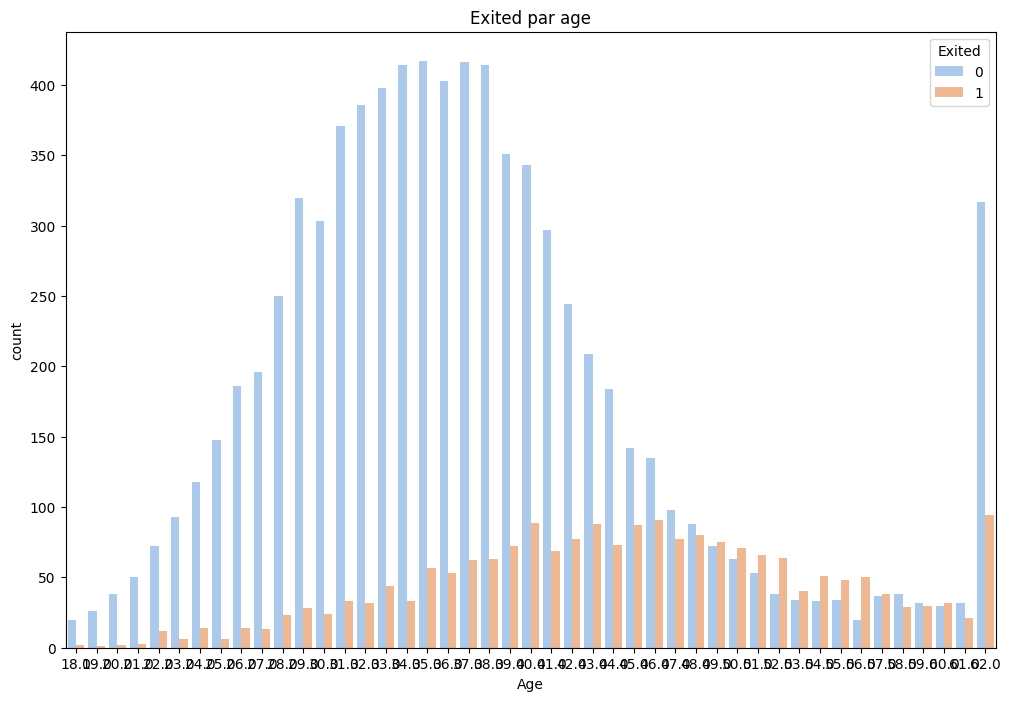

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age', hue='Exited', data=df, palette='pastel')
plt.title("Exited par age")
plt.show()


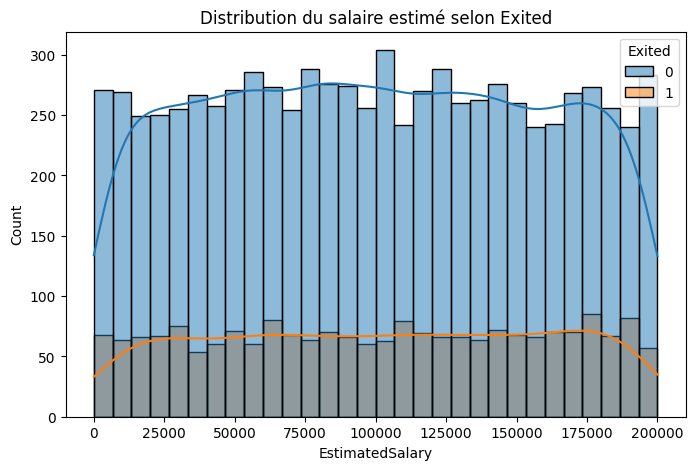

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=True, bins=30)
plt.title("Distribution du salaire estimé selon Exited")
plt.show()


**3-le modele**  

In [86]:
df.to_csv("Churn_Clean.csv", index=False)
print("✅ Données nettoyées enregistrées dans 'Churn_Clean.csv'")

✅ Données nettoyées enregistrées dans 'Churn_Clean.csv'


In [87]:
#Split data to X et y
X = df.drop(['Exited'], axis=1)
y = df[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [88]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train 


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_freq_encode
9254,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26,0.5014
1561,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86,0.2509
1670,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02,0.2477
6087,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40,0.5014
6669,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04,0.5014
...,...,...,...,...,...,...,...,...,...,...
5734,768.0,1.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,0.5014
5191,682.0,0.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,0.5014
5390,735.0,0.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,0.5014
860,667.0,1.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,0.5014


In [89]:
#FEATURE SCALING 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.35651162,  0.91324755, -0.67855303, ...,  0.97481699,
         1.36766974,  1.00146073],
       [-0.20436787,  0.91324755,  0.34415355, ...,  0.97481699,
         1.6612541 , -0.98581834],
       [-0.96259384,  0.91324755, -1.49671828, ..., -1.02583358,
        -0.25280688, -1.01120474],
       ...,
       [ 0.86545782, -1.09499335, -0.06492908, ..., -1.02583358,
        -0.1427649 ,  1.00146073],
       [ 0.15916513,  0.91324755,  0.4464242 , ..., -1.02583358,
        -0.05082558,  1.00146073],
       [ 0.47076485,  0.91324755,  1.26458946, ...,  0.97481699,
        -0.81456811, -0.98581834]])

In [90]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

c:\Users\Elie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

confusion matrix(train):


<Axes: >

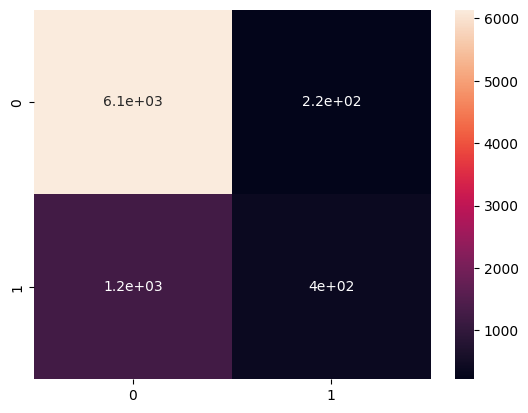

In [91]:
#Evaluation du modele 
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm_train=confusion_matrix(y_train,y_pred_train)
print('confusion matrix(train):')
sns.heatmap(cm_train, annot=True)

In [92]:
print (classification_report(y_train,y_pred_train))
print('Accuracy(train)',accuracy_score(y_train,y_pred_train))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6356
           1       0.65      0.24      0.35      1644

    accuracy                           0.82      8000
   macro avg       0.74      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000

Accuracy(train) 0.817125


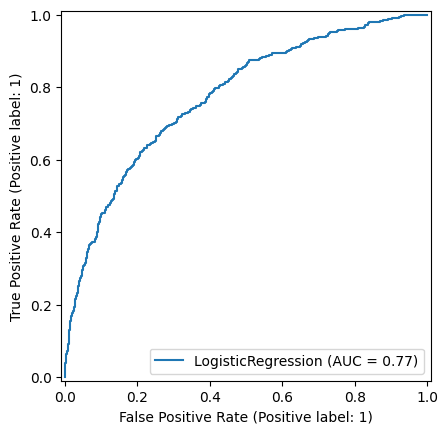

In [93]:

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier,X_test,y_test)

In [94]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_freq_encode'],
      dtype='object')

In [95]:
import numpy as np

preds = classifier.predict(X_test)
unique, counts = np.unique(preds, return_counts=True)
print(dict(zip(unique, counts)))





{np.int64(0): np.int64(1859), np.int64(1): np.int64(141)}


In [96]:
import joblib
joblib.dump(classifier, "LogisticR.pkl")


['LogisticR.pkl']

In [97]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']